# Linear regression

## Toy example

Data from twenty people at a gym.

In [1]:
# Load toy data
from sklearn import datasets
import pandas as pd

linnerud = datasets.load_linnerud()
print(linnerud.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

:Number of Instances: 20
:Number of Attributes: 3
:Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. dropdown:: References

   * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
     Editions Technic.



In [2]:
# Let's make a DataFrame of it
exercise_df = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)
physiology_df = pd.DataFrame(linnerud.target, columns=['Weight', 'Waist', 'Pulse'])
gym_df = pd.concat([exercise_df, physiology_df], axis='columns')  
# Column-wise concat, but better to use merge with a common index across tables if possible
gym_df

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


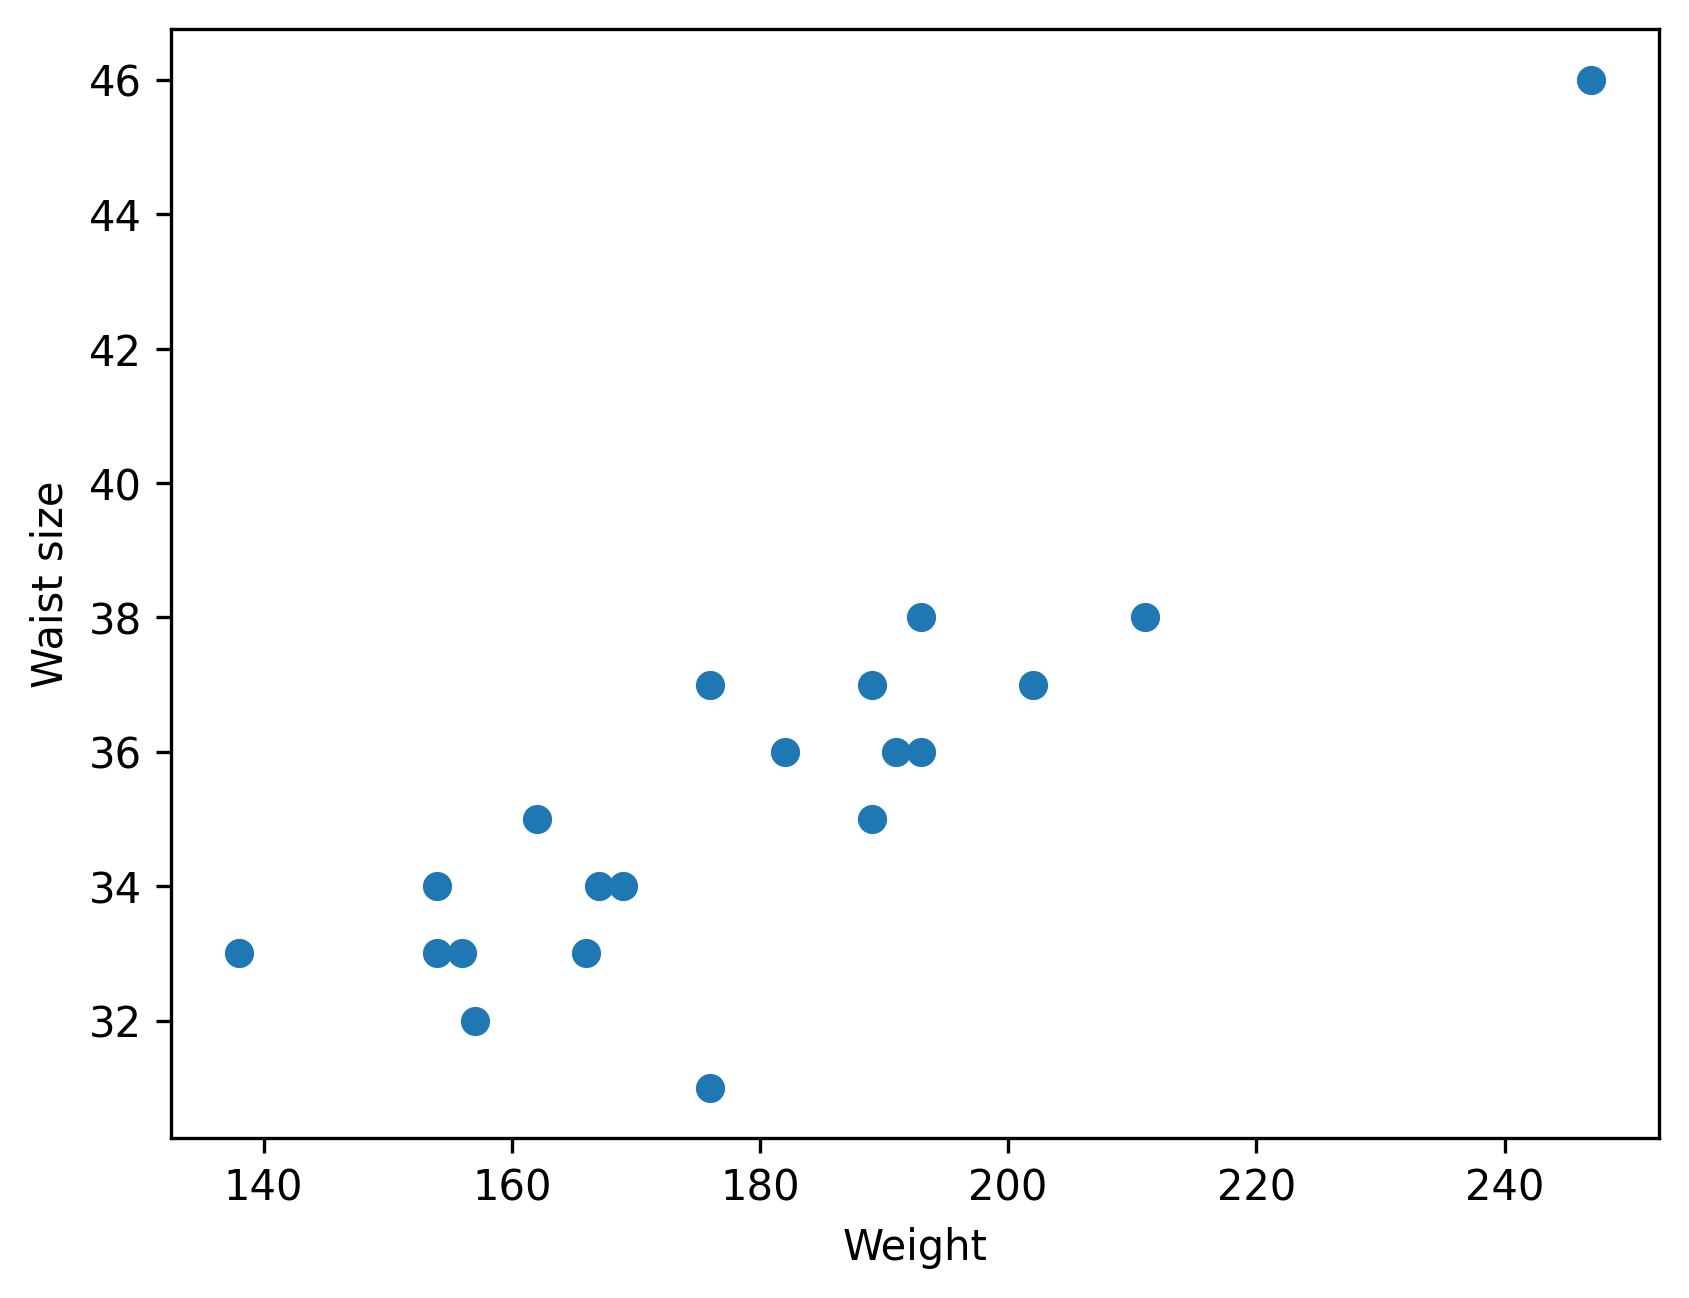

In [3]:
import matplotlib.pyplot as plt

plt.figure(dpi=300)  
plt.scatter(gym_df.Weight, gym_df.Waist)
plt.xlabel('Weight')
plt.ylabel('Waist size')
plt.show()

## Regression intuition
Our first model assumes there's a linear relationship between a person's weight and their waist size. 
A simple way to estimate this relationship is by plotting weight against waist size and drawing a straight line (linear regression). 

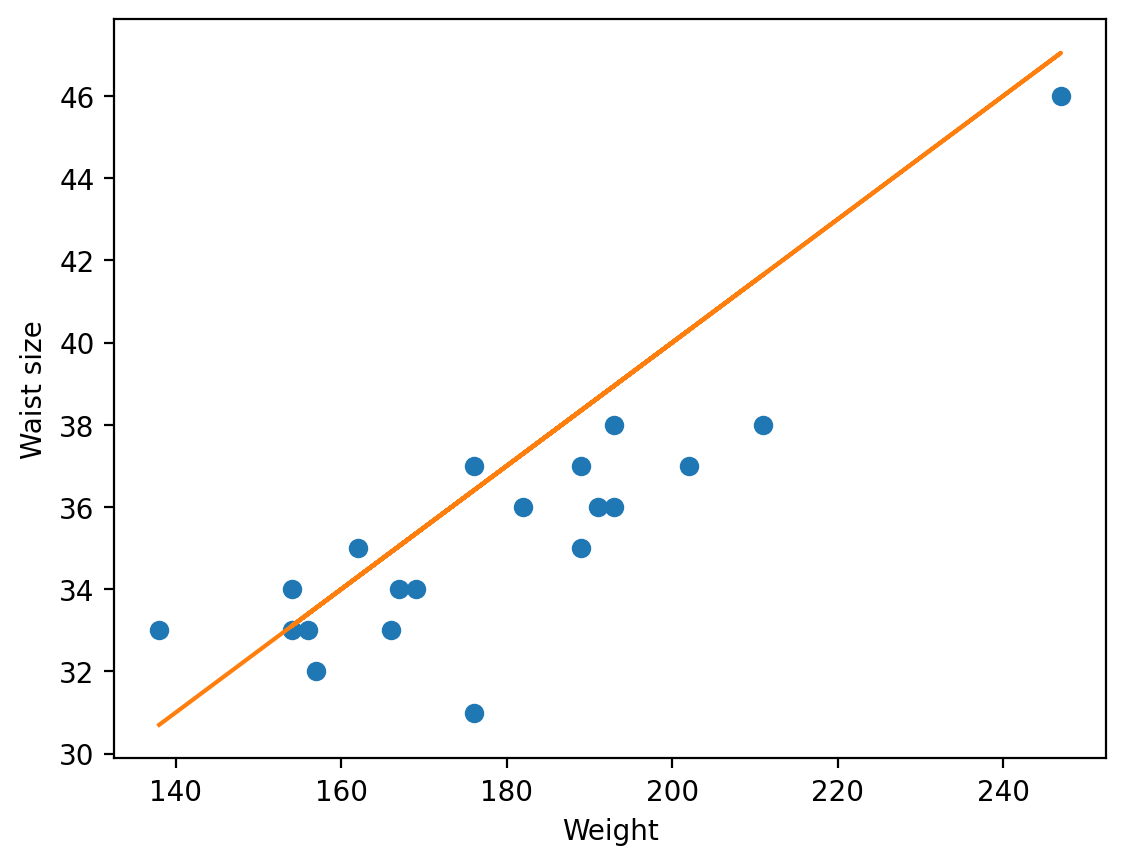

In [4]:
# Example code for a linear regression model
# y = m * x + b 
# We need to learn `m` and `b` from the data -- i.e., ML

m = 0.15  # Just guesses
b = 10
x = gym_df.Weight

y = m * x + b
plt.figure(dpi=200)
plt.scatter(gym_df.Weight, gym_df.Waist)
plt.xlabel('Weight')
plt.ylabel('Waist size')
plt.plot(x, y, c='C1')
plt.show()
# But realistically very tough to just make guesses like this -- we need to find the parameters from data!
# Also, we might have more than just 1 predictor feature, which complicates life.

## Load/explore more real-world data

We saw this dataset before, but last time we analyzed it as a classification task by predicting whether Zone 1 power consumption would be above or below average.

Regression is a much better fit for this problem; we can get a more precise understanding.

In [5]:
# Power consumption data 
# There are three zones with power consumption
# Remember zone column names have spaces! ...
# and that all are pretty correlated with temperature
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv')
df

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


### Why a decision tree won't work

Recall computing Gini impurity for a decision split. What do we do? Take a weighted average of each class.

In [6]:
# Simple example for the impurity evaluation at
# one leaf of the tree, or one node (like a cell)
def gini(class1_count, class2_count):
    n = class1_count + class2_count
    return 2 * class1_count / n * class2_count / n

copy_df = df.copy()
copy_df['label'] = df['Zone 1 Power Consumption'] > \
    df['Zone 1 Power Consumption'].mean()

cutoff = 11
subset1_df = copy_df[copy_df.Temperature <= cutoff]
subset2_df = copy_df[copy_df.Temperature > cutoff]
subset1_gini = gini((subset1_df.label == True).sum(),(subset1_df.label == False).sum())
subset2_gini = gini((subset2_df.label == True).sum(),(subset2_df.label == False).sum())
avg_gini = (subset1_gini * len(subset1_df) + subset2_gini * len(subset2_df)) / len(df)
print(subset1_gini, subset2_gini)
# Could do this for more than 2 classes

0.25705085026152147 0.49839854125267213


In [7]:
# But what about for a regression problem?
df['Zone 1 Power Consumption'].nunique()  # So many values!
# Cannot reasonably treat them as individual classes

27709

### Graph example relationships for the label

Text(0, 0.5, 'Power consumption')

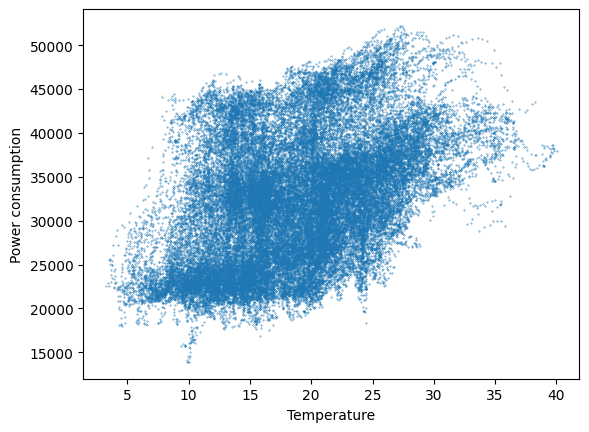

In [8]:
plt.figure(dpi=100)
plt.scatter(df.Temperature, df['Zone 1 Power Consumption'], s=.1)
plt.xlabel('Temperature')
plt.ylabel('Power consumption')
# Temperature and power consumption are positively correlated, 
# with increased temperatures leading to higher power consumption
# But non-linear pattern
# Power consumption remains relatively stable at lower temperatures (below 17°C), 
# but rises sharply as the temperature increases beyond that threshold. 
# E.g., A/C might be activated after 17°C

Text(0, 0.5, 'Power consumption')

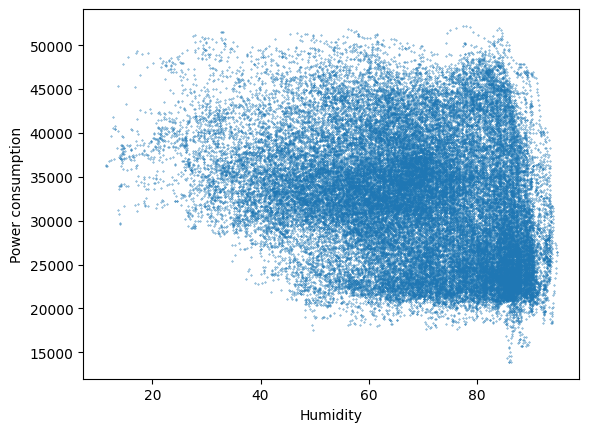

In [9]:
plt.figure(dpi=100)
plt.scatter(df.Humidity, df['Zone 1 Power Consumption'], s=.1)
plt.xlabel('Humidity')
plt.ylabel('Power consumption')

## Linear regression prediction with sklearn

In [10]:
from sklearn import linear_model, model_selection
model = linear_model.LinearRegression()
model
# Not many hyper-parameters to consider
# LR is a simple model

LinearRegression()

In [11]:
xval = model_selection.KFold(10, shuffle=True)
model = linear_model.LinearRegression()
features = ['Temperature', 'Humidity']
X = df[features]
y = df['Zone 1 Power Consumption']
results = model_selection.cross_validate(model, X, y, scoring='r2', cv=xval, return_train_score=True)
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# R^2=1: Perfect fit; model explains all the variability of the target data.
# R^2=0: The model does not explain any variability in the target data.
# R^2<0: The model performs worse than a horizontal line (mean of the true values).
results

{'fit_time': array([0.02263284, 0.00400186, 0.00699902, 0.00445843, 0.00399971,
        0.00499749, 0.00500035, 0.0048697 , 0.00390577, 0.00300479]),
 'score_time': array([0.00425267, 0.00199866, 0.00300264, 0.00301838, 0.00299954,
        0.00199628, 0.00201583, 0.00199819, 0.00218844, 0.00199342]),
 'test_score': array([0.20159597, 0.18455419, 0.20378308, 0.20903821, 0.20628166,
        0.20623652, 0.20201419, 0.2053432 , 0.20762133, 0.20154063]),
 'train_score': array([0.20306366, 0.20492231, 0.20281893, 0.20223014, 0.20253976,
        0.20254413, 0.20300505, 0.20264681, 0.20239491, 0.20305433])}

In [12]:
print('R^2 mean:', results['test_score'].mean())
print('R^2 SD:', results['test_score'].std())

R^2 mean: 0.2028008977439923
R^2 SD: 0.006558118212766468


In [13]:
print('Training data R^2 mean:', results['train_score'].mean())
print('Training data R^2 SD:', results['train_score'].std())
# Almost identical!
# The linear regression model is not really capable of overfitting with these few features and so many data points.
# (It is possible with a ton of features though.)
#   -- The relationship between temperature and power consumption clearly changes around 17°C, a nonlinear effect
# So next week we will talk about nonlinear regression.

Training data R^2 mean: 0.20292200297385019
Training data R^2 SD: 0.0007195446071625236


# Let's implement RMSE!

In [14]:
import numpy as np

y_pred = [1.5, 1.9, 2.3, 1.4]
y_true = [1.6, 2.2, 2.2, 1.5]

# Compute RMSE 
# For each index i, compute differences between y_pred_i and y_true_i
# raise the diff to the power of 2, then average across all and take the square root
# YOUR CODE HERE

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

rmse(np.array(y_true), np.array(y_pred))

0.1732050807568878

## Why not absolute value for loss/error?

mean 12.0


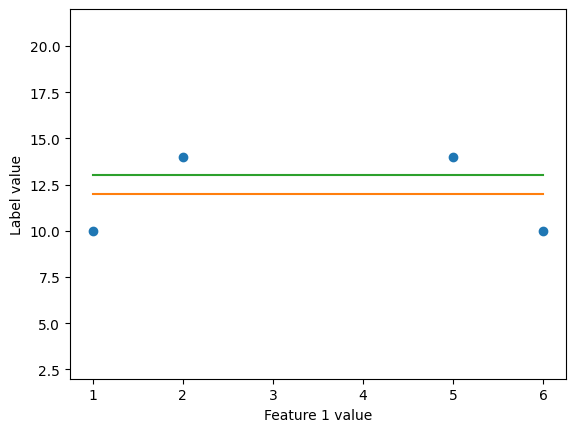

In [15]:
dfabs = pd.DataFrame({
    'feature1': [1, 2, 5, 6],
    'label': [10, 14, 14, 10],
})
plt.figure(dpi=100)
plt.scatter(dfabs.feature1, dfabs.label)
plt.margins(y=2)
plt.xlabel('Feature 1 value')
plt.ylabel('Label value')
print('mean', (10+14+14+10)/4)
# Show, then add L2 line:
squared_predictions = [12, 12, 12, 12]
plt.plot(dfabs.feature1, squared_predictions, c='C1')

abs_predictions = [13, 13, 13, 13]
plt.plot(dfabs.feature1, abs_predictions, c='C2')
# Which line is better?
#Predictions = 12: Absolute Error=∣10−12∣+∣14−12∣+∣14−12∣+∣10−12∣=2+2+2+2=8
#Predictions = 13: Absolute Error=∣10−13∣+∣14−13∣+∣14−13∣+∣10−13∣=3+1+1+3=8
# Even 14 or 10 has the same absolute error!
# This highlights an interesting property of the L1 (absolute error) loss function:
# multiple predictions can have the same absolute error, even though the median typically minimizes the sum of absolute errors.

In [16]:
abs_error = (dfabs.label - abs_predictions).abs().mean()
abs_error2 = (dfabs.label - squared_predictions).abs().mean()
print(abs_error, abs_error2)

2.0 2.0


In [17]:
squared_error = ((dfabs.label - abs_predictions) ** 2).mean()
squared_error2 = ((dfabs.label - squared_predictions) ** 2).mean()
print(squared_error, squared_error2)

5.0 4.0


## Seoul bike sharing data example

Predict number of bikes rented based on weather. Observe nonlinear effects.

In [18]:
bsdf = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv',
    encoding_errors='ignore')  # New in Pandas 1.3.0 -- could be an issue
bsdf

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [19]:
# compute correlation coefficients 
# ignoring non-numeric columns such as strings or categorical data
bsdf.corr(numeric_only=True) 

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


Text(0, 0.5, 'Number of bikes rented')

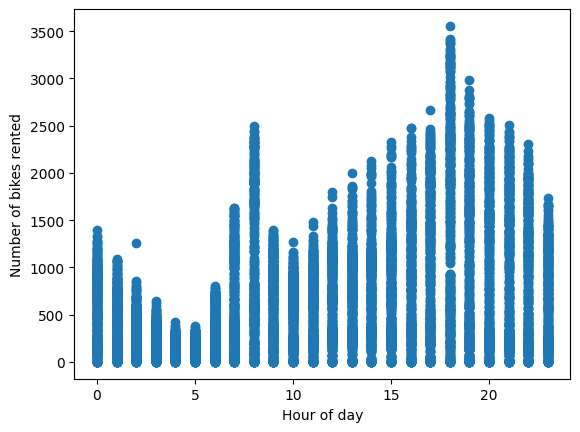

In [20]:
plt.figure(dpi=100)
plt.scatter(bsdf.Hour, bsdf['Rented Bike Count'])
plt.xlabel('Hour of day')
plt.ylabel('Number of bikes rented')

Text(0, 0.5, 'Number of bikes rented')

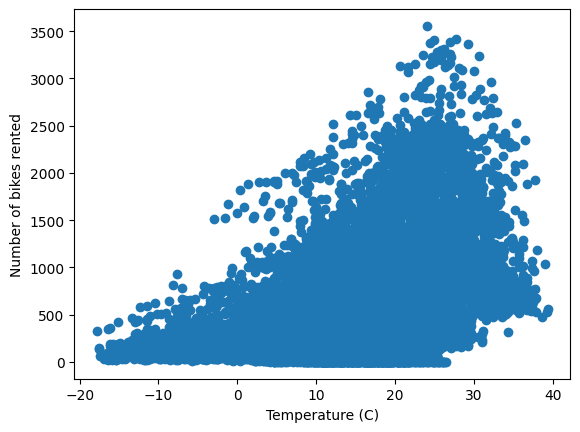

In [21]:
plt.figure(dpi=100)
plt.scatter(bsdf['Temperature(C)'], bsdf['Rented Bike Count'])
plt.xlabel('Temperature (C)')
plt.ylabel('Number of bikes rented')

In [22]:
xval = model_selection.KFold(10, shuffle=True)
model = linear_model.LinearRegression()
features = ['Temperature(C)', 'Hour']
X = bsdf[features]
y = bsdf['Rented Bike Count']
results = model_selection.cross_validate(model, X, y,
    scoring='r2', cv=xval, return_train_score=True)
results

{'fit_time': array([0.00300002, 0.00317025, 0.00299597, 0.0019989 , 0.00199771,
        0.00199652, 0.00300074, 0.00100017, 0.00199986, 0.00200415]),
 'score_time': array([0.00110984, 0.00119424, 0.00099969, 0.00099945, 0.00100017,
        0.00199819, 0.00100017, 0.00199986, 0.        , 0.00201535]),
 'test_score': array([0.41044998, 0.38401669, 0.41501476, 0.41665357, 0.39602915,
        0.40041275, 0.43419812, 0.4205859 , 0.40558236, 0.39970648]),
 'train_score': array([0.40959651, 0.4124962 , 0.40883614, 0.4090332 , 0.41136166,
        0.41059952, 0.40703751, 0.40859213, 0.41012786, 0.41064602])}

In [23]:
print('R^2 mean:', results['test_score'].mean())
print('R^2 SD:', results['test_score'].std())
print('Train R^2 mean:', results['train_score'].mean())

R^2 mean: 0.40826497597122485
R^2 SD: 0.013508633979821003
Train R^2 mean: 0.40983267423247105


In [24]:
predictions = model_selection.cross_val_predict(model, X, y, cv=xval)
predictions  # Negative predictions!
# If the relationship between the features (like Temperature and Hour) and the target variable (number of bikes rented) 
# is not perfectly linear, the model might predict negative values for some input conditions (e.g., very low temperatures).
# If for a test data point, the input feature values are outside the range where the model was trained 
# or if there is not enough data in certain regions  (e.g., very low temperatures) the model might extrapolate inappropriately, leading to negative predictions.

array([-149.87052216, -128.33749574, -114.00971843, ...,  737.71991049,
        762.76207408,  783.95439316])

Text(0, 0.5, 'Predicted bikes rented')

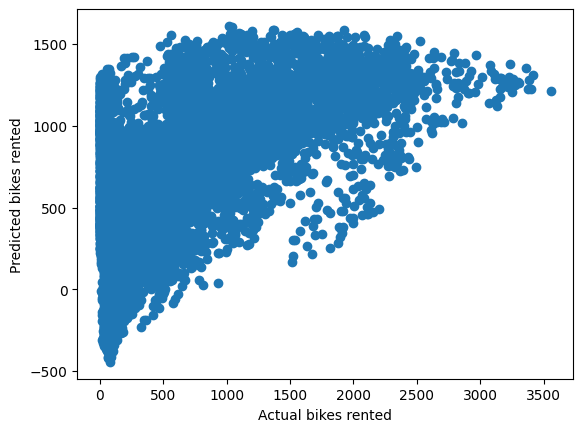

In [25]:
plt.scatter(y, predictions)
plt.xlabel('Actual bikes rented')
plt.ylabel('Predicted bikes rented')

## Visualizing the learned model

In [26]:
# First create one model on all data -- "the" model

model.fit(X, y)

LinearRegression()

In [27]:
# Find range of features
bsdf[features].describe()

,Temperature(C),Hour
count,8760.000000,8760.000000
mean,12.882922,11.500000
std,11.944825,6.922582
min,-17.800000,0.000000
25%,3.500000,5.750000
50%,13.700000,11.500000
75%,22.500000,17.250000
max,39.400000,23.000000


In [28]:
## Make predictions for a range of the two features
temperatures = []
hours = []
for temperature in np.linspace(-17.8, 39.4, 50):
    for hour in np.linspace(0, 23, 50):
        temperatures.append(temperature)
        hours.append(hour)

visualize_X = pd.DataFrame(
    {'Temperature(C)': temperatures,
     'Hour': hours})
visualize_X

predictions = model.predict(visualize_X)
predictions

array([-489.68988419, -474.43593427, -459.18198436, ..., 1756.97663054,
       1772.23058045, 1787.48453036])

### Marginal plot in 2D

Text(0, 0.5, 'Predicted number of bikes rented')

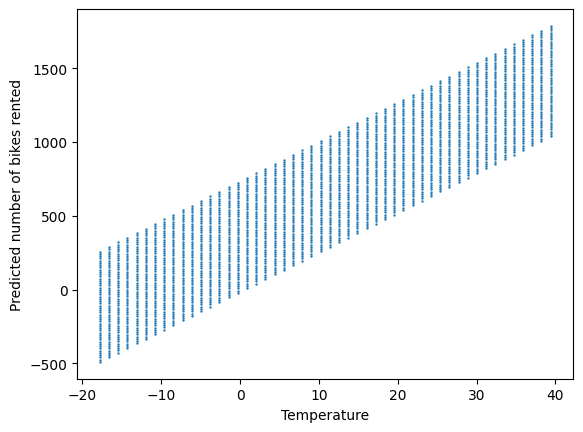

In [29]:
plt.figure(dpi=100)
plt.scatter(visualize_X['Temperature(C)'], predictions, s=.5)
plt.xlabel('Temperature')
plt.ylabel('Predicted number of bikes rented')

Text(0, 0.5, 'Predicted number of bikes rented')

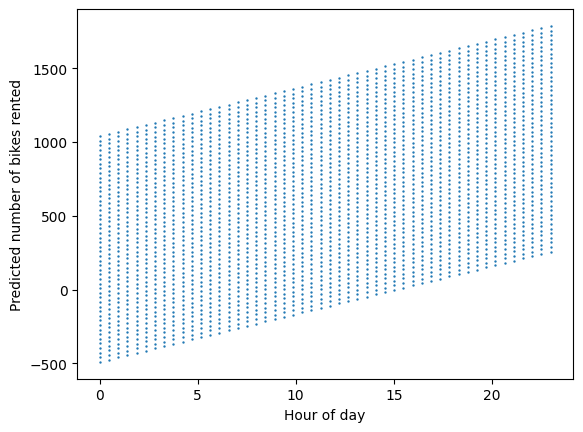

In [30]:
plt.figure(dpi=100)
plt.scatter(visualize_X.Hour, predictions, s=.5)
plt.xlabel('Hour of day')
plt.ylabel('Predicted number of bikes rented')
# Not a linear relationship!
# Next week we'll talk about how to do better with non-linear regression